In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('Partial.csv')

In [11]:
df.head()

,Date,Text,Poster,Likes,MultiMedia
0,"Sep 14, 2022",Just #PutAnEgg on it! Have you tried this speg...,eggsoeufs,31,https://scontent.cdninstagram.com/v/t51.2885-1...
1,"Feb 9, 2020",1️⃣ Roll dough\n2️⃣ Add sauce and toppings\n3️...,eggsoeufs,320,https://scontent.cdninstagram.com/v/t51.2885-1...
2,"Jun 5, 2017",The perfect post workout power snack from @del...,eggsoeufs,114,https://scontent.cdninstagram.com/v/t51.2885-1...
3,"Jul 29, 2018",Don’t let those 3 PM snack cravings sneak up o...,eggsoeufs,1068,https://scontent.cdninstagram.com/v/t51.2885-1...
4,"Dec 27, 2022","Don’t be weird like Kevun, be like @alybrassar...",eggsoeufs,25,https://instagram.fymq2-1.fna.fbcdn.net/v/t51....


In [12]:
df.shape

(638, 5)

In [13]:
df['wordcount'] = df['Text'].apply(lambda x: len(x.split()))

In [14]:
df.head()

,Date,Text,Poster,Likes,MultiMedia,wordcount
0,"Sep 14, 2022",Just #PutAnEgg on it! Have you tried this speg...,eggsoeufs,31,https://scontent.cdninstagram.com/v/t51.2885-1...,83
1,"Feb 9, 2020",1️⃣ Roll dough\n2️⃣ Add sauce and toppings\n3️...,eggsoeufs,320,https://scontent.cdninstagram.com/v/t51.2885-1...,65
2,"Jun 5, 2017",The perfect post workout power snack from @del...,eggsoeufs,114,https://scontent.cdninstagram.com/v/t51.2885-1...,19
3,"Jul 29, 2018",Don’t let those 3 PM snack cravings sneak up o...,eggsoeufs,1068,https://scontent.cdninstagram.com/v/t51.2885-1...,41
4,"Dec 27, 2022","Don’t be weird like Kevun, be like @alybrassar...",eggsoeufs,25,https://instagram.fymq2-1.fna.fbcdn.net/v/t51....,51


### Word Cloud

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [39]:
nltk.download('punkt', 'french', 'english')

True

In [40]:
# The text contains both english and french, so we have to remove both sets
stop_words = stopwords.words('french') + stopwords.words('english')
# Apply looks at each row uses word_tokenize to split the text into a list.
# Uses lower case since the stopwords are all in lower case.
df['clean_text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if 
                                                        word.lower() not in stop_words]))

In [ ]:
egg_mask = np.array(Image.open('e'))

In [47]:
text = ' '.join(df['clean_text'])
wc = WordCloud(colormap='tab20c',
              background_color='white').generate(text)

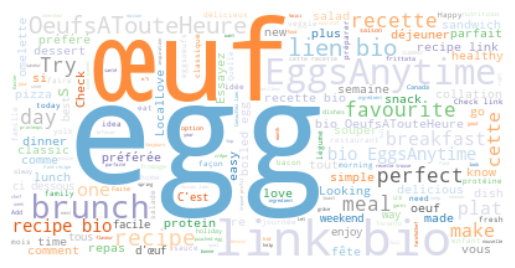

In [48]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()